In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [25]:
data = {
    'Country': ["Singapore", "Australia", "Indonesia", "UAE", "India", "Bahrain", "Malaysia", "Philippines", 
                "Thailand", "Saudi Arabia", "Qatar", "Egypt", "South Africa", "Iran", "Vietnam", "Israel", 
                "Oman", "Sri Lanka", "Kuwait", "Mauritius", "Tanzania", "Pakistan", "Mozambique", "Iraq", 
                "Reunion", "Maldives", "Bangladesh", "Djibouti", "Seychelles", "Cambodia", "Sudan", "Yemen", 
                "Myanmar", "Madagascar", "Somalia", "Comoros", "Eritrea"],
    'Cargo': [252348, 75202, 151212, 76331, 136549, 4809, 67375, 74203, 66793, 21671, 9776, 66405, 22142, 14934, 
              38945, 18454, 8385, 13029, 5483, 4287, 3923, 7448, 3973, 3478, 1005, 2955, 10879, 3946, 1366, 1299, 
              1459, 1545, 1632, 1077, 1303, 310, 214],
    'Tanker': [330779, 13746, 88522, 70842, 51733, 2349, 54875, 23849, 87495, 24172, 11718, 20782, 6631, 2903, 
               7815, 2481, 5757, 2789, 5106, 3229, 1172, 4500, 1457, 4959, 95, 629, 2280, 1449, 441, 649, 1013, 
               613, 200, 338, 207, 16, 38],
    'Passenger': [355237, 737138, 492730, 36618, 10365, 4757, 36707, 103130, 13664, 3570, 17201, 1454, 12974, 6853, 
                  4353, 850, 3924, 142, 89, 178, 13252, 7, 771, 298, 1714, 3958, 27, 27, 2640, 76, 45, 33, 5, 154, 
                  26, 145, 4],
    'Pleasure_Craft': [683130, 197614, 10594, 17183, 3643, 109145, 5572, 1152, 10047, 2839, 14026, 613, 9421, 1284, 
                       2593, 14169, 428, 4225, 115, 555, 135, 677, 179, 37, 1706, 4267, 38, 109, 1600, 127, 58, 12, 65, 
                       37, 58, 0, 19],
    'Fishing': [6573, 16973, 6969, 5864, 20927, 156070, 6633, 553, 3351, 13247, 4654, 153, 27541, 1392, 10298, 7728, 
                213, 1740, 41, 4325, 41, 626, 1076, 3, 1087, 45, 73, 119, 140, 963, 7, 0, 82, 259, 7, 1, 0],
    'Tug': [181471, 134459, 94773, 46573, 64876, 30226, 54537, 11298, 14848, 28424, 21148, 10788, 3802, 8706, 1169, 
            3283, 4680, 897, 9375, 5922, 823, 2167, 5144, 6278, 3114, 697, 174, 6052, 3, 963, 730, 423, 131, 169, 211, 
            21, 2],
    'Others': [452045, 202340, 184013, 247539, 151137, 56849, 123929, 25435, 27777, 97292, 56941, 22149, 31826, 51194, 
               12748, 19828, 12933, 9708, 8185, 5742, 2647, 6463, 7190, 2788, 8429, 3973, 1661, 2084, 443, 1908, 85, 155, 
               616, 552, 68, 805, 1],
    'coastal_length' : [193, 25760, 54716, 1318, 7516, 161, 4675, 36289, 3219, 2640, 563, 2450, 2798, 2440, 3444, 273, 
                        2092,1340, 499, 177, 1424, 1046, 2470, 58, 207, 644, 580, 314, 491, 443, 853, 1906, 1930, 4828, 
                        3333, 340, 2234],
    'GDP_2019': [376.84, 1392.22, 1116.63, 417.99, 2835.61, 38.65, 365.18, 376.82, 543.98, 838.56, 192.40, 302.50, 
                 351.43, 454.01, 261.92, 395.10, 76.70, 84.21, 134.81, 14.02, 63.22, 278.22, 15.32, 234.10, 21.8, 
                 4.94, 317.47, 3.24, 1.59, 27.13, 66.50, 26.91, 76.09, 27.04, 6.49, 1.20, 1.98]
                                                                
}

df = pd.DataFrame(data)

# Display the first few rows of the dataframe
print(df.head())

     Country   Cargo  Tanker  Passenger  Pleasure_Craft  Fishing     Tug  \
0  Singapore  252348  330779     355237          683130     6573  181471   
1  Australia   75202   13746     737138          197614    16973  134459   
2  Indonesia  151212   88522     492730           10594     6969   94773   
3        UAE   76331   70842      36618           17183     5864   46573   
4      India  136549   51733      10365            3643    20927   64876   

   Others  coastal_length  GDP_2019  
0  452045             193    376.84  
1  202340           25760   1392.22  
2  184013           54716   1116.63  
3  247539            1318    417.99  
4  151137            7516   2835.61  


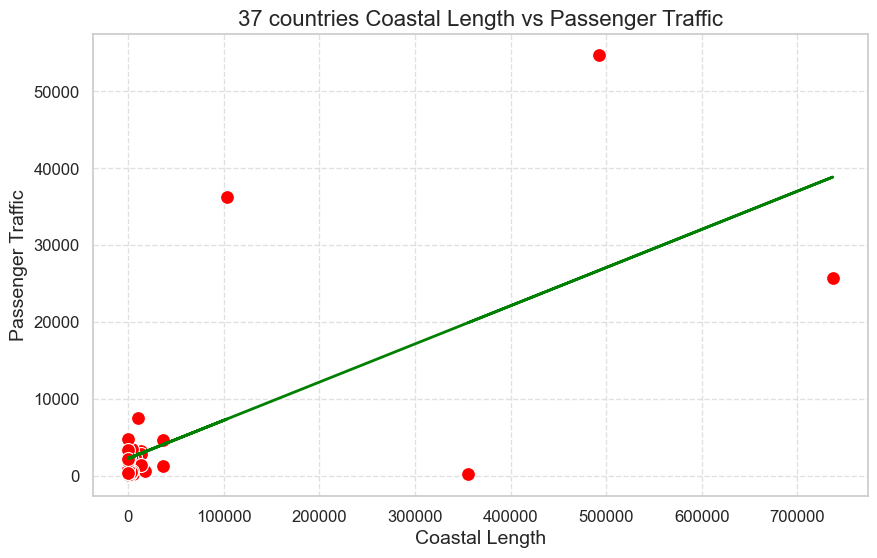

In [26]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare the data
X = df['Passenger'].values.reshape(-1, 1)
y = df['coastal_length'].values

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Make predictions
predictions = model.predict(X)

# Set a seaborn style
sns.set(style="whitegrid")

# Visualize the linear regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Passenger',y='coastal_length' , data=df, s=100, color='red')
plt.plot(X, predictions, color='green', linewidth=2)
plt.title('37 countries Coastal Length vs Passenger Traffic', fontsize=16)
plt.xlabel('Coastal Length', fontsize=14)
plt.ylabel('Passenger Traffic', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# Save the figure
plt.savefig('coastal length vs passenger traffic.png')
# Display the plot
plt.show()




c:\Users\malag\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\malag\AppData\Local\Temp\ipykernel_31592\1310285983.py:11: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  scatter = sns.scatterplot(x='Cargo', y='Passenger', hue='Cluster', data=df, palette='Set1', s=80, style='Cluster', markers=['o', 's', 'D'])


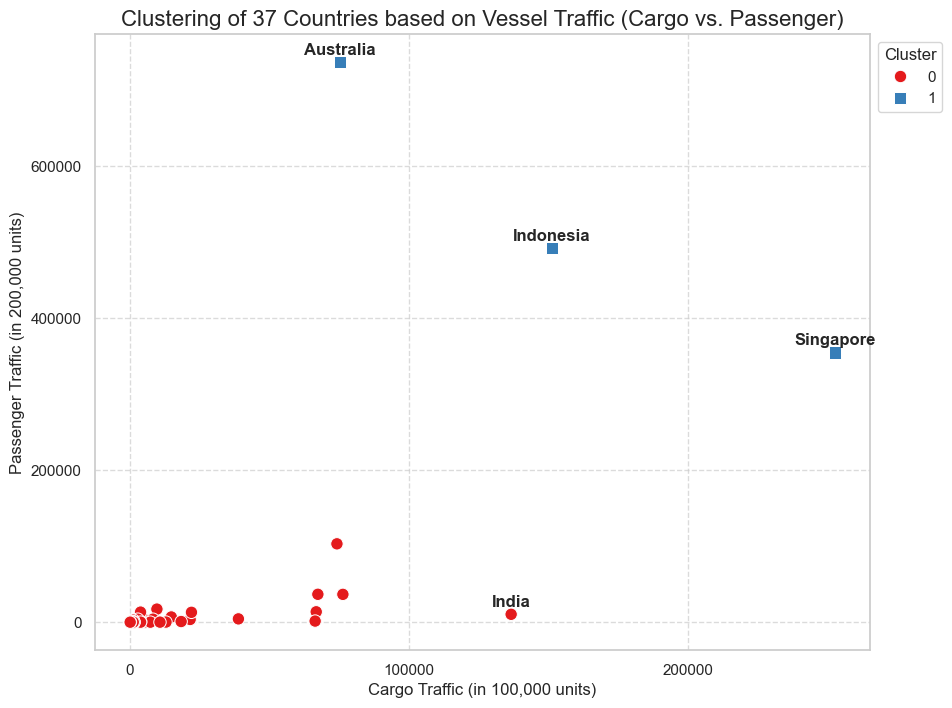

In [27]:
# Gather required data and standardize
columns_for_clustering = ['Cargo', 'Tanker', 'Passenger', 'Pleasure_Craft', 'Fishing', 'Tug', 'Others']
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[columns_for_clustering])

# Apply K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(x='Cargo', y='Passenger', hue='Cluster', data=df, palette='Set1', s=80, style='Cluster', markers=['o', 's', 'D'])
plt.legend(title='Cluster', loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Clustering of 37 Countries based on Vessel Traffic (Cargo vs. Passenger)', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlabel('Cargo Traffic (in 100,000 units)', fontsize=12)
plt.ylabel('Passenger Traffic (in 200,000 units)', fontsize=12)
plt.xticks(np.arange(0, df['Cargo'].max()+1, 100000))
plt.yticks(np.arange(0, df['Passenger'].max()+1, 200000))

selected_countries = ['India', 'Australia', 'Indonesia']
for index, row in df.iterrows():
    if row['Country'] in selected_countries:
        # Increase the font size for specific countries
        font_size = 12
        plt.text(row['Cargo'], row['Passenger']+10000, row['Country'], ha='center', fontsize=font_size, fontweight='bold')

# Label Singapore separately
singapore_data = df[df['Country'] == 'Singapore']
plt.text(singapore_data['Cargo'].values[0], singapore_data['Passenger'].values[0]+10000, 'Singapore', ha='center', fontsize=12, fontweight='bold')

sns.set(style="whitegrid")
plt.savefig('clustering (cargo vs passenger).png')
plt.show()

The equation of the regression line is y = [58.20632036]x + [13314.5583018]


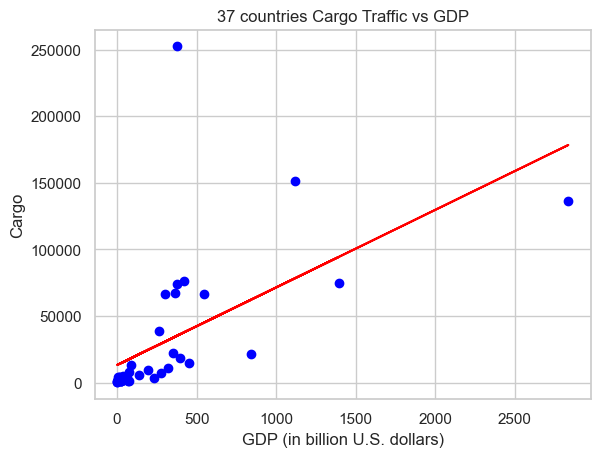

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Replace 'None' values with zero
df['GDP_2019'].fillna(0, inplace=True)


# Create a Linear Regression model
model = LinearRegression()

# Reshape the data to fit the model
X = df['GDP_2019'].values.reshape(-1,1)
y = df['Cargo'].values.reshape(-1,1)

# Fit the data to the model
model.fit(X, y)

# Get the coefficient and intercept of the line
coef = model.coef_[0]
intercept = model.intercept_

# Print the equation of the line
print(f'The equation of the regression line is y = {coef}x + {intercept}')

# Predict the 'Cargo' values
y_pred = model.predict(X)

# Plot the data and the regression line
plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='red')
plt.title('37 countries Cargo Traffic vs GDP')
plt.xlabel('GDP (in billion U.S. dollars)')
plt.ylabel('Cargo')
plt.savefig('cargo traffic vs gdp.png')
plt.show()


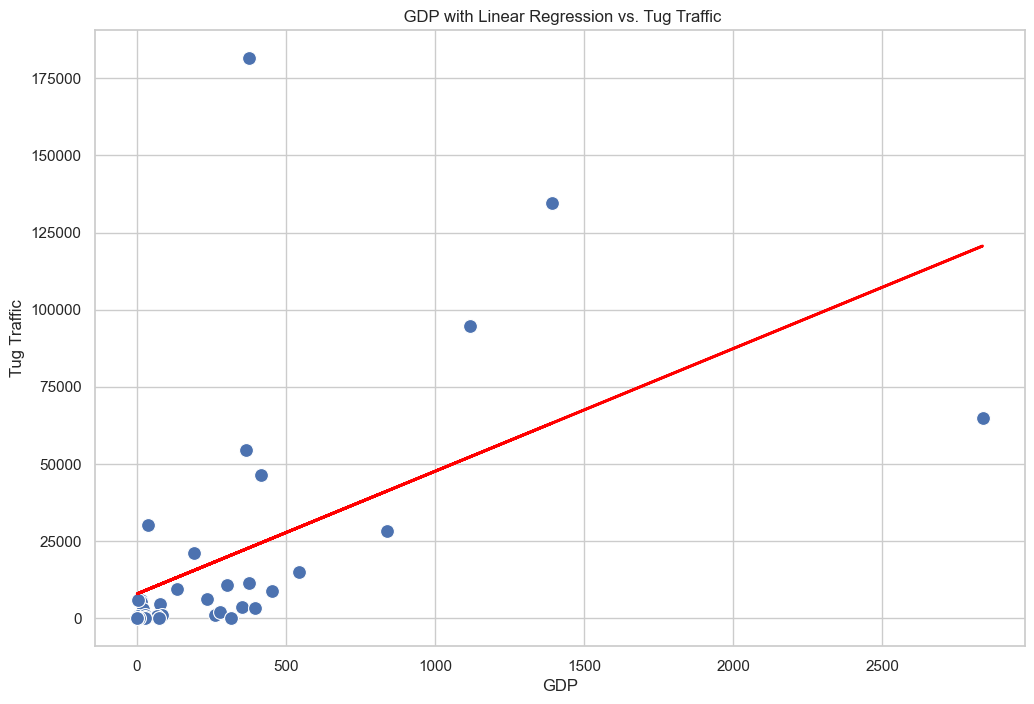

In [34]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='GDP_2019', y='Tug', data=df, s=100)

# Fit a linear regression model
model = LinearRegression()
X = df[['GDP_2019']]
y = df['Tug']
model.fit(X, y)

# Plotting the regression line
plt.plot(X, model.predict(X), color='red', linewidth=2)

plt.title(' GDP  vs. Tug Traffic of 37 countries')
plt.xlabel('GDP')
plt.ylabel('Tug Traffic')
plt.savefig('tug traffic vs gdp.png')
plt.show()
